# 🖼️ Generic Image Classification Pipeline

## Complete Pipeline: From Image Files to Model Deployment

---

### 📚 What You Will Learn

1. **Image Preprocessing** - Load, resize, convert to grayscale/color
2. **Feature Extraction** - Extract HOG, LBP, Color Histogram, and other image features
3. **Dataset Preparation** - Organize data into train/test or train/validation/test splits
4. **Model Training** - Train and compare multiple ML classifiers
5. **Hyperparameter Tuning** - Fine-tune the best model using Grid/Random Search
6. **Model Evaluation** - Analyze performance with metrics and visualizations
7. **Model Deployment** - Build a Flask web app for browser-based prediction

---

### 🎯 Pipeline Overview

```
┌──────────────────────────────────────────────────────────────────────────────┐
│                    IMAGE CLASSIFICATION PIPELINE                             │
├──────────────────────────────────────────────────────────────────────────────┤
│                                                                              │
│   🖼️ Image Files     📐 Resize/Norm      🔬 Features         📊 Vectors     │
│  ┌──────────┐       ┌──────────┐       ┌──────────┐       ┌──────────┐       │
│  │ Class 1  │ ────▶ │  Resize  │ ────▶ │   HOG    │ ────▶ │ Feature  │       │
│  │ Class 2  │       │ Grayscale│       │   LBP    │       │  Vector  │       │
│  │ Class N  │       │ Normalize│       │  Color   │       │          │       │
│  └──────────┘       └──────────┘       └──────────┘       └────┬─────┘       │
│                                                                │             │
│                                                                ▼             │
│   🌐 Web Browser     🏆 Best Model      🤖 Train Models   ┌──────────┐       │
│  ┌──────────┐       ┌──────────┐       ┌──────────┐       │  Scale   │       │
│  │ Upload & │ ◀──── │  Tuned   │ ◀──── │ Compare  │ ◀──── │   &      │       │
│  │ Predict  │       │  Model   │       │ 10 Models│       │  Split   │       │
│  └──────────┘       └──────────┘       └──────────┘       └──────────┘       │
│                                                                              │
└──────────────────────────────────────────────────────────────────────────────┘
```

---

### ⚙️ How to Use This Notebook

1. **Customize the Configuration Section** (Step 0) with your class names and file paths
2. **Run each cell sequentially** from top to bottom
3. **Modify parameters** as needed for your specific use case
4. **Save your trained model** for deployment

---

## 📖 دليل التخصيص للطلاب (Arabic Guide)

<div dir="rtl" style="text-align: right; background: #f8f9fa; padding: 20px; border-radius: 10px; border-right: 5px solid #667eea;">

### 🎯 كيفية تخصيص هذا الكود لمشروعك

هذا الـ Notebook مصمم ليكون **قابل للتخصيص بالكامل** لأي مشروع تصنيف صور. اتبع الخطوات التالية:

---

### 📝 الخطوة 1: تغيير اسم المشروع

```python
PROJECT_NAME = "اسم_مشروعك"  # مثال: "fashion_mnist", "face_emotion", "scene_classification"
```

**أمثلة:**
- تصنيف الأزياء: `"fashion_classification"`
- تصنيف المشاعر: `"emotion_recognition"`
- تصنيف المشاهد: `"scene_classification"`
- تصنيف الحيوانات: `"animal_classification"`

---

### 📂 الخطوة 2: تحديد الفئات ومجلدات الصور

#### الطريقة 1: إذا كانت الصور في مجلدات منفصلة لكل فئة
```python
DATA_MODE = 'folders'  # الصور مقسمة في مجلدات
DATA_PATH = 'path/to/your/data'
# هيكل المجلدات:
# data/
#   ├── class_1/
#   │   ├── image1.jpg
#   │   └── image2.jpg
#   ├── class_2/
#   └── class_3/
```

#### الطريقة 2: إذا كانت الصور مع ملف CSV للتسميات
```python
DATA_MODE = 'csv'  # الصور مع ملف CSV
IMAGES_PATH = 'path/to/images'
LABELS_FILE = 'path/to/labels.csv'
IMAGE_COL = 'filename'  # اسم عمود اسم الصورة
LABEL_COL = 'label'     # اسم عمود التسمية
```

---

### ⚙️ الخطوة 3: ضبط إعدادات الصورة

| الإعداد | الوصف | القيم الموصى بها |
|---------|-------|------------------|
| `IMG_SIZE` | حجم الصورة | `(64, 64)` للسرعة، `(128, 128)` للدقة |
| `COLOR_MODE` | نوع اللون | `'grayscale'` للأشكال، `'rgb'` للألوان |

**للصور الرمادية (الأشكال والحواف):**
```python
IMG_SIZE = (64, 64)
COLOR_MODE = 'grayscale'
```

**للصور الملونة (المشاهد والطبيعة):**
```python
IMG_SIZE = (128, 128)
COLOR_MODE = 'rgb'
```

---

### 🎨 الخطوة 4: اختيار الخصائص (Features)

| الخاصية | الوصف | متى تستخدمها؟ |
|---------|-------|---------------|
| `USE_HOG` | خصائص الحواف والأشكال | ✅ للأشكال والوجوه والأزياء |
| `USE_LBP` | خصائص الملمس المحلي | ✅ للملمس والتفاصيل الدقيقة |
| `USE_COLOR_HIST` | هيستوجرام الألوان | ✅ للصور الملونة والمشاهد |
| `USE_HSV_HIST` | هيستوجرام HSV | ✅ للتمييز بين الألوان المتشابهة |
| `USE_PIXEL` | قيم البكسل مباشرة | ⚠️ فقط للصور الصغيرة جداً |

**للأزياء والوجوه (صور رمادية):**
```python
USE_HOG = True
USE_LBP = True
USE_COLOR_HIST = False
USE_HSV_HIST = False
```

**للمشاهد والطبيعة (صور ملونة):**
```python
USE_HOG = True
USE_LBP = True
USE_COLOR_HIST = True
USE_HSV_HIST = True
```

---

### 📊 الخطوة 5: اختيار طريقة تقسيم البيانات

**الخيار 1: تدريب واختبار فقط (للتجارب السريعة)**
```python
USE_VALIDATION_SET = False
TRAIN_TEST_RATIO = 0.80  # 80% تدريب، 20% اختبار
```

**الخيار 2: تدريب + تحقق + اختبار (موصى به)**
```python
USE_VALIDATION_SET = True
TRAIN_RATIO = 0.70   # 70% للتدريب
VAL_RATIO = 0.15     # 15% للتحقق (Validation)
TEST_RATIO = 0.15    # 15% للاختبار النهائي
```

**💡 نصيحة:** استخدم `USE_VALIDATION_SET = True` عند استخدام Hyperparameter Tuning

---

### 🚀 أمثلة مشاريع كاملة

#### مثال 1: تصنيف المشاعر من الوجوه
```python
PROJECT_NAME = "emotion_recognition"
DATA_MODE = 'folders'
DATA_PATH = 'data/fer2013'
IMG_SIZE = (48, 48)
COLOR_MODE = 'grayscale'
USE_HOG = True
USE_LBP = True
USE_COLOR_HIST = False
```

#### مثال 2: تصنيف المشاهد الطبيعية
```python
PROJECT_NAME = "scene_classification"
DATA_MODE = 'folders'
DATA_PATH = 'data/intel_scenes'
IMG_SIZE = (128, 128)
COLOR_MODE = 'rgb'
USE_HOG = True
USE_LBP = True
USE_COLOR_HIST = True
USE_HSV_HIST = True
```

#### مثال 3: تصنيف الأزياء (Fashion-MNIST)
```python
PROJECT_NAME = "fashion_mnist"
DATA_MODE = 'csv'
IMG_SIZE = (28, 28)
COLOR_MODE = 'grayscale'
USE_HOG = True
USE_LBP = False
USE_COLOR_HIST = False
```

#### مثال 4: التعرف على الأرقام المكتوبة بخط اليد (MNIST) ✍️
```python
# ═══════════════════════════════════════════════════════════════
# التعرف على الأرقام الإنجليزية (0-9)
# Handwritten Digit Recognition (English)
# ═══════════════════════════════════════════════════════════════

PROJECT_NAME = "handwritten_digit_recognition"

# مصدر البيانات | Data Source
DATA_MODE = 'folders'
DATA_PATH = 'data/mnist'
# هيكل المجلدات المطلوب:
# data/mnist/
#   ├── 0/
#   │   ├── img_0001.png
#   │   └── img_0002.png
#   ├── 1/
#   ├── 2/
#   ....
#   └── 9/

# إعدادات الصورة | Image Settings
IMG_SIZE = (28, 28)        # حجم MNIST الأصلي
COLOR_MODE = 'grayscale'   # الأرقام رمادية
MAX_IMAGES_PER_CLASS = 1000  # للتدريب السريع (None لكل الصور)

# إعدادات الخصائص | Feature Settings
USE_HOG = True             # ✅ ممتاز للحواف والانحناءات
USE_LBP = False            # ❌ غير ضروري للأرقام البسيطة
USE_COLOR_HIST = False     # ❌ الصور رمادية
USE_HSV_HIST = False       # ❌ الصور رمادية
USE_PIXEL = False          # ⚠️ اختياري

# إعدادات HOG للصور الصغيرة | HOG Settings for Small Images
HOG_ORIENTATIONS = 9
HOG_PIXELS_PER_CELL = (4, 4)   # خلايا أصغر للصور الصغيرة
HOG_CELLS_PER_BLOCK = (2, 2)

# 📦 مصدر البيانات: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
# 🎯 الدقة المتوقعة: 95-99%
# 🏆 أفضل نموذج: SVM (RBF) أو Random Forest
```

#### مثال 5: التعرف على الأرقام العربية المكتوبة بخط اليد 🔢
```python
# ═══════════════════════════════════════════════════════════════
# التعرف على الأرقام العربية/الهندية (٠-٩)
# Arabic Handwritten Digit Recognition
# ═══════════════════════════════════════════════════════════════

PROJECT_NAME = "arabic_digit_recognition"

# مصدر البيانات | Data Source
DATA_MODE = 'folders'
DATA_PATH = 'data/arabic_digits'
# هيكل المجلدات المطلوب:
# data/arabic_digits/
#   ├── 0/    (٠)
#   ├── 1/    (١)
#   ├── 2/    (٢)
#   ├── 3/    (٣)
#   ├── 4/    (٤)
#   ├── 5/    (٥)
#   ├── 6/    (٦)
#   ├── 7/    (٧)
#   ├── 8/    (٨)
#   └── 9/    (٩)

# إعدادات الصورة | Image Settings
IMG_SIZE = (32, 32)        # حجم مناسب للأرقام العربية
COLOR_MODE = 'grayscale'
MAX_IMAGES_PER_CLASS = None  # استخدام كل الصور

# إعدادات الخصائص | Feature Settings
USE_HOG = True             # ✅ ممتاز للحواف
USE_LBP = True             # ✅ مفيد للتفاصيل الدقيقة في الأرقام العربية
USE_COLOR_HIST = False
USE_HSV_HIST = False
USE_PIXEL = False

# إعدادات HOG | HOG Settings
HOG_ORIENTATIONS = 9
HOG_PIXELS_PER_CELL = (4, 4)
HOG_CELLS_PER_BLOCK = (2, 2)

# إعدادات LBP | LBP Settings
LBP_RADIUS = 2
LBP_POINTS = 16

# 📦 مصدر البيانات: https://www.kaggle.com/datasets/mloey1/ahdd1
# 🎯 الدقة المتوقعة: 94-98%
# 🏆 أفضل نموذج: SVM (RBF) أو Random Forest
```

#### 💡 نصائح خاصة بالأرقام المكتوبة بخط اليد

| النصيحة | التفاصيل |
|---------|----------|
| **HOG هو الأفضل** | يلتقط الحواف والانحناءات المميزة لكل رقم |
| **خلايا صغيرة** | استخدم `(4,4)` بدلاً من `(8,8)` للصور الصغيرة |
| **LBP للعربية** | مفيد للأرقام العربية لأنها تحتوي تفاصيل أكثر |
| **SVM أو RF** | هذان النموذجان يعطيان أفضل نتائج |
| **Augmentation** | دوران بسيط (±10°) يحسن الدقة |

---

### ⚠️ أخطاء شائعة يجب تجنبها

| الخطأ | الحل |
|-------|------|
| مسار الملف غير صحيح | تأكد من وجود المجلد باستخدام `os.path.exists()` |
| عدد الصور قليل جداً | جمّع المزيد من البيانات أو استخدم Data Augmentation |
| الموديل overfitting | استخدم `USE_VALIDATION_SET = True` |
| الدقة منخفضة | جرب خصائص مختلفة أو زيادة حجم الصورة |
| التدريب بطيء | قلل حجم الصورة أو عدد الصور |
| خطأ في الألوان | تأكد من `COLOR_MODE` مناسب للصور |

---

### 💡 للمساعدة

إذا واجهت أي مشكلة:
1. تأكد من تثبيت جميع المكتبات المطلوبة
2. تحقق من مسارات الصور
3. راجع رسائل الخطأ بعناية
4. جرب مع عدد صور أقل أولاً للتأكد من عمل الكود

</div>

---

## 📦 Step 0: Configuration & Setup

### ⚠️ CUSTOMIZE THIS SECTION FOR YOUR PROJECT

In [9]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🔧 PROJECT CONFIGURATION                           ║
# ║                                                                            ║
# ║  ⚠️  MODIFY THIS SECTION FOR YOUR SPECIFIC PROJECT  ⚠️                    ║
# ╚════════════════════════════════════════════════════════════════════════════╝

# ─────────────────────────────────────────────────────────────────────────────
# PROJECT NAME (used for output directories and saved models)
# ─────────────────────────────────────────────────────────────────────────────
from ast import If


PROJECT_NAME = "Arabic_Handwritten_Digits"  # e.g., "emotion_recognition", "scene_classification"

# ─────────────────────────────────────────────────────────────────────────────
# DATA SOURCE CONFIGURATION
# ─────────────────────────────────────────────────────────────────────────────
DATA_MODE = 'folders'  # Options: 'folders' or 'csv'

# If DATA_MODE = 'folders':
# Your data should be organized as:
#   data_path/
#     ├── class_1/
#     │   ├── img1.jpg
#     │   └── img2.jpg
#     ├── class_2/
#     └── class_3/
DATA_PATH = 'C:\\Users\\lenovo\\Desktop\\handwriting\\ANGKA_ARAB'  # Path to your organized data

# If DATA_MODE = 'csv':
IMAGES_PATH = 'data/images'    # Path to images folder
LABELS_FILE = 'data/labels.csv'  # Path to CSV with labels
IMAGE_COL = 'filename'         # Column name for image filename
LABEL_COL = 'label'            # Column name for class label

# ─────────────────────────────────────────────────────────────────────────────
# IMAGE PROCESSING SETTINGS
# ─────────────────────────────────────────────────────────────────────────────
IMG_SIZE = (64, 64)            # (width, height) - Resize all images to this size
                               # Smaller = faster, Larger = more detail
                               # Common sizes: (28,28), (64,64), (128,128), (224,224)

COLOR_MODE = 'grayscale'       # Options: 'grayscale' or 'rgb'
                               # 'grayscale' for shapes/edges (fashion, digits, faces)
                               # 'rgb' for color-dependent tasks (scenes, objects)

MAX_IMAGES_PER_CLASS = None    # Set to a number to limit images per class, None for all
                               # Useful for balancing classes or quick testing

# ─────────────────────────────────────────────────────────────────────────────
# FEATURE EXTRACTION SETTINGS
# ─────────────────────────────────────────────────────────────────────────────
USE_HOG = True                 # Histogram of Oriented Gradients (edges/shapes)
USE_LBP = True                 # Local Binary Patterns (texture)
USE_COLOR_HIST = False         # RGB Color Histogram (requires COLOR_MODE='rgb')
USE_HSV_HIST = False           # HSV Color Histogram (requires COLOR_MODE='rgb')
USE_PIXEL = False              # Raw pixel values (only for very small images)

# HOG Parameters
HOG_ORIENTATIONS = 9           # Number of gradient orientations اتجاهات
HOG_PIXELS_PER_CELL = (4, 4)   # Cell size in pixels
HOG_CELLS_PER_BLOCK = (2, 2)   # Cells per block for normalization

# LBP Parameters
LBP_RADIUS = 3                 # Radius for LBP
LBP_POINTS = 24                # Number of points for LBP (typically 8 * radius)   بيبص على 24 نقطة حوالين كل بكسل

# Color Histogram Parameters
#COLOR_HIST_BINS = 32           # Number of bins per channel

# ─────────────────────────────────────────────────────────────────────────────
# DATASET SPLIT CONFIGURATION
# ─────────────────────────────────────────────────────────────────────────────
USE_VALIDATION_SET = True      # Set to False for train/test only
                               # Set to True for train/validation/test split

#If USE_VALIDATION_SET = True:
TRAIN_RATIO = 0.70             # 70% for training
VAL_RATIO = 0.15               # 15% for validation
TEST_RATIO = 0.15              # 15% for testing
#If USE_VALIDATION_SET = False:
TRAIN_TEST_RATIO = 0.80        # 80% train, 20% test

# ─────────────────────────────────────────────────────────────────────────────
# OUTPUT DIRECTORIES
# ─────────────────────────────────────────────────────────────────────────────
OUTPUT_DIR = f'{PROJECT_NAME}_dataset'    # Dataset output directory
MODELS_DIR = f'{PROJECT_NAME}_models'     # Saved models directory
RESULTS_DIR = f'{PROJECT_NAME}_results'   # Results and visualizations

# Random seed for reproducibility
RANDOM_SEED = 42

print("✅ Configuration loaded!")
print(f"   Project: {PROJECT_NAME}")
print(f"   Data Mode: {DATA_MODE}")
print(f"   Image Size: {IMG_SIZE}")
print(f"   Color Mode: {COLOR_MODE}")
print(f"   Features: HOG={USE_HOG}, LBP={USE_LBP}, ColorHist={USE_COLOR_HIST}, HSV={USE_HSV_HIST}")
print(f"   Split Mode: {'Train/Validation/Test' if USE_VALIDATION_SET else 'Train/Test only'}")

✅ Configuration loaded!
   Project: Arabic_Handwritten_Digits
   Data Mode: folders
   Image Size: (64, 64)
   Color Mode: grayscale
   Features: HOG=True, LBP=True, ColorHist=False, HSV=False
   Split Mode: Train/Validation/Test


In [10]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📦 INSTALL DEPENDENCIES                            ║
# ╚════════════════════════════════════════════════════════════════════════════╝

# Uncomment and run this cell if you need to install dependencies
!pip install numpy pandas scikit-learn scikit-image opencv-python matplotlib seaborn joblib flask tqdm pillow -q

In [11]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📚 IMPORT LIBRARIES                                ║
# ╚════════════════════════════════════════════════════════════════════════════╝

import os
import numpy as np
import pandas as pd
import cv2
#from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from glob import glob
from tqdm import tqdm
import joblib
import time
from typing import List, Tuple, Dict, Optional
#from shutil import copy2
import warnings
warnings.filterwarnings('ignore')

# Image processing
from skimage.feature import hog, local_binary_pattern
from skimage import exposure

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# ML Models
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Set random seed
np.random.seed(RANDOM_SEED)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [12]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📁 CREATE OUTPUT DIRECTORIES                       ║
# ╚════════════════════════════════════════════════════════════════════════════╝

for directory in [OUTPUT_DIR, MODELS_DIR, RESULTS_DIR]:
    Path(directory).mkdir(parents=True, exist_ok=True)
    print(f"📁 Created: {directory}")

📁 Created: Arabic_Handwritten_Digits_dataset
📁 Created: Arabic_Handwritten_Digits_models
📁 Created: Arabic_Handwritten_Digits_results


---

## 🖼️ Step 1: Load and Preprocess Images

### This step loads images from your data source and prepares them for feature extraction

In [13]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🖼️ IMAGE LOADING FUNCTIONS                         ║
# ╚════════════════════════════════════════════════════════════════════════════╝



def load_image(image_path: str, img_size: Tuple[int, int], color_mode: str) -> np.ndarray:
    """
    Load and preprocess a single image.

    Args:
        image_path: Path to the image file
        img_size: Target size (width, height)
        color_mode: 'grayscale' or 'rgb'

    Returns:
        Preprocessed image as numpy array
    """
    # Read image
    if color_mode == 'grayscale':
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if img is None:
        raise ValueError(f"Could not load image: {image_path}")

    # Resize
    img = cv2.resize(img, img_size)

    return img



def load_images_from_folders(data_path: str, img_size: Tuple[int, int],
                             color_mode: str, max_per_class: Optional[int] = None) -> Tuple[np.ndarray, np.ndarray, List[str]]:
    """
    Load images organized in class folders.

    Args:
        data_path: Path to root folder containing class subfolders
        img_size: Target image size
        color_mode: 'grayscale' or 'rgb'
        max_per_class: Maximum images per class (None for all)

    Returns:
        images: Array of images
        labels: Array of label indices
        class_names: List of class names
    """
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(data_path)
                         if os.path.isdir(os.path.join(data_path, d))])

    print(f"\n📂 Loading images from: {data_path}")
    print(f"📋 Found {len(class_names)} classes: {class_names}")

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_path, class_name)
        image_files = glob(os.path.join(class_path, '*.jpg')) + \
                     glob(os.path.join(class_path, '*.png')) + \
                     glob(os.path.join(class_path, '*.jpeg'))

        if max_per_class:
            image_files = image_files[:max_per_class]

        print(f"   🖼️ {class_name}: {len(image_files)} images")

        for img_path in image_files:
            try:
                img = load_image(img_path, img_size, color_mode)
                images.append(img)
                labels.append(class_idx)
            except Exception as e:
                continue

    return np.array(images), np.array(labels), class_names




print("✅ Image loading functions defined!")

✅ Image loading functions defined!


In [14]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📥 LOAD YOUR IMAGES                                ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("📥 Loading Images")
print("="*60)

if DATA_MODE == 'folders':
    images, labels, CLASS_NAMES = load_images_from_folders(
        DATA_PATH, IMG_SIZE, COLOR_MODE, MAX_IMAGES_PER_CLASS
    )
else:
    raise ValueError(f"Unknown DATA_MODE: {DATA_MODE}")

print(f"\n✅ Loaded {len(images)} images!")
print(f"   📊 Images shape: {images.shape}")
print(f"   📊 Labels shape: {labels.shape}")
print(f"   📊 Classes: {CLASS_NAMES}")


📥 Loading Images

📂 Loading images from: C:\Users\lenovo\Desktop\handwriting\ANGKA_ARAB
📋 Found 10 classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
   🖼️ 0: 935 images
   🖼️ 1: 935 images
   🖼️ 2: 935 images
   🖼️ 3: 935 images
   🖼️ 4: 935 images
   🖼️ 5: 935 images
   🖼️ 6: 935 images
   🖼️ 7: 935 images
   🖼️ 8: 935 images
   🖼️ 9: 935 images

✅ Loaded 9350 images!
   📊 Images shape: (9350, 64, 64)
   📊 Labels shape: (9350,)
   📊 Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']



🖼️ Sample Images


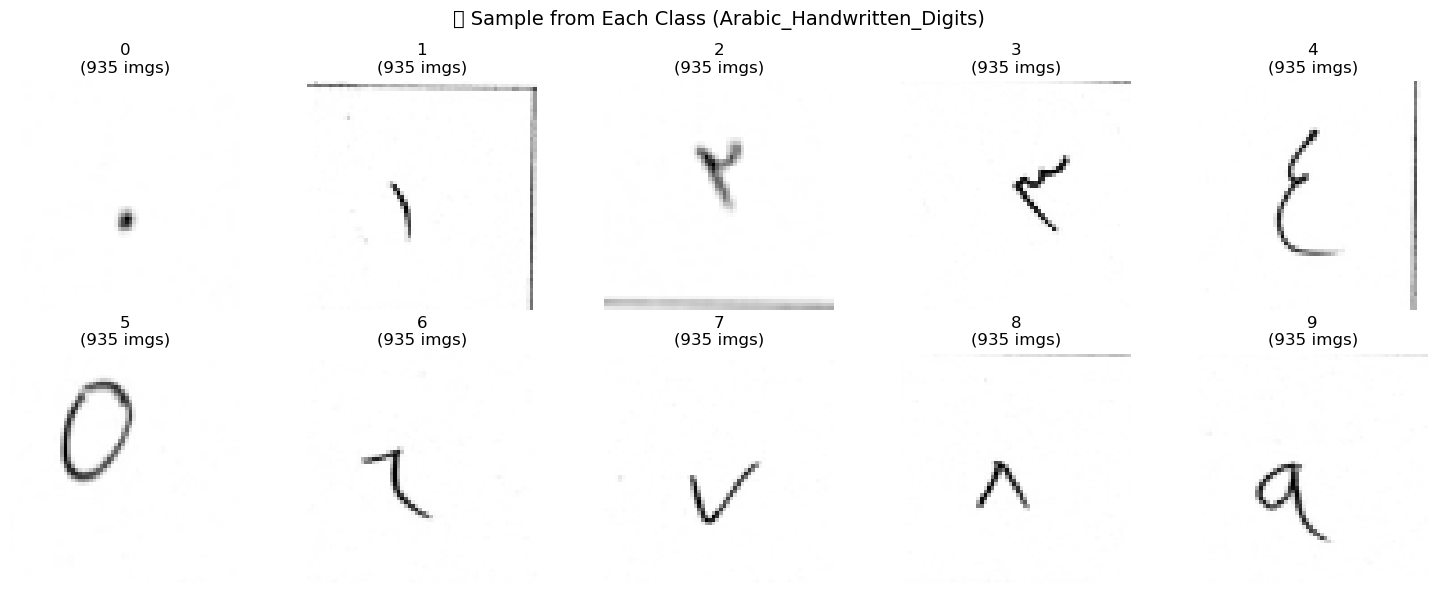

In [15]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📊 VISUALIZE SAMPLE IMAGES                         ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("🖼️ Sample Images")
print("="*60)

n_classes = len(CLASS_NAMES)
n_cols = min(5, n_classes)
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))
if n_rows == 1:
    axes = [axes]
axes = np.array(axes).flatten()

for i, class_name in enumerate(CLASS_NAMES):
    idx = np.where(labels == i)[0]
    if len(idx) > 0:
        sample_idx = idx[0]
        if COLOR_MODE == 'grayscale':
            axes[i].imshow(images[sample_idx], cmap='gray')
        else:
            axes[i].imshow(images[sample_idx])
        axes[i].set_title(f'{class_name}\n({len(idx)} imgs)')
        axes[i].axis('off')

# Hide empty subplots
for i in range(len(CLASS_NAMES), len(axes)):
    axes[i].axis('off')

plt.suptitle(f'🖼️ Sample from Each Class ({PROJECT_NAME})', fontsize=14)
plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

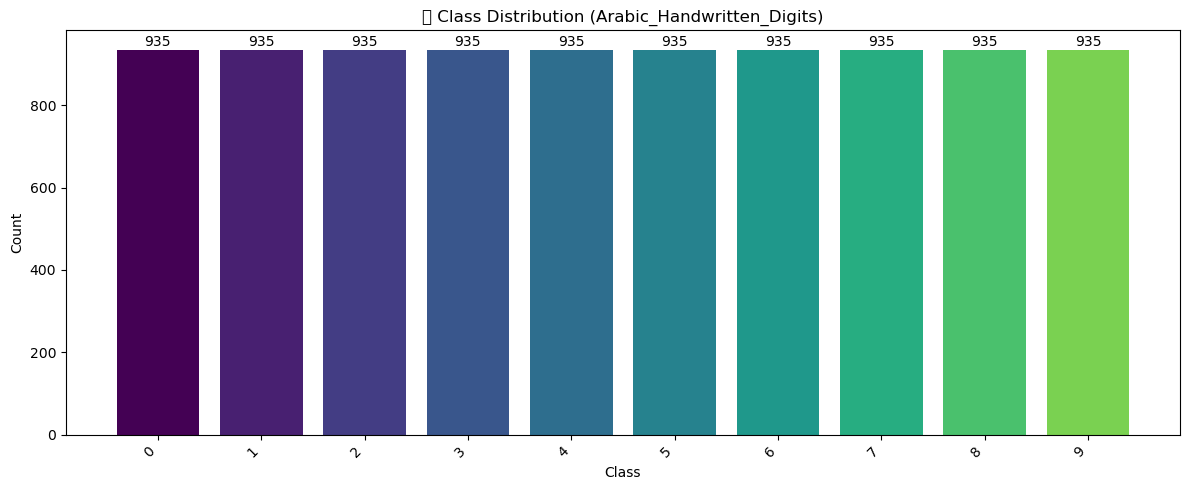

✅ Classes are relatively balanced (ratio: 1.0x)


In [16]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📊 CLASS DISTRIBUTION                              ║
# ╚════════════════════════════════════════════════════════════════════════════╝

unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(12, 5))
colors = plt.cm.viridis(np.linspace(0, 0.8, len(CLASS_NAMES)))
bars = plt.bar(CLASS_NAMES, counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title(f'📊 Class Distribution ({PROJECT_NAME})')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Check for imbalance
imbalance_ratio = max(counts) / min(counts)
if imbalance_ratio > 2:
    print(f"⚠️ Warning: Class imbalance detected (ratio: {imbalance_ratio:.1f}x)")
    print("   Consider using stratified sampling or class weights.")
else:
    print(f"✅ Classes are relatively balanced (ratio: {imbalance_ratio:.1f}x)")

---

## 🔬 Step 2: Feature Extraction

### Extract discriminative features from images using HOG, LBP, and Color Histograms

In [17]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🔬 FEATURE EXTRACTION FUNCTIONS                    ║
# ╚════════════════════════════════════════════════════════════════════════════╝

def extract_hog_features(image: np.ndarray) -> np.ndarray:
    """
    Extract HOG (Histogram of Oriented Gradients) features.
    Good for capturing shapes and edges.
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    features = hog(
        gray,
        orientations=HOG_ORIENTATIONS,
        pixels_per_cell=HOG_PIXELS_PER_CELL,
        cells_per_block=HOG_CELLS_PER_BLOCK,
        channel_axis=None
    )
    return features


def extract_lbp_features(image: np.ndarray, n_bins: int = 26) -> np.ndarray:
    """
    Extract LBP (Local Binary Pattern) features.
    Good for capturing texture patterns.
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method='uniform')   # Calculate LBP texture codes for every pixel using a circular neighborhood
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))      # Count how often each pattern occurs and store the counts in bins
    hist = hist.astype('float32')          # Convert counts to decimal numbers for math operations
    hist /= (hist.sum() + 1e-6)  # Normalize       # Scale values between 0 and 1 so image size doesn't change the results   If a neighbor is darker, it's marked 0  If a neighbor is brighter than the center, it's marked 1.   
    return hist



def extract_all_features(image: np.ndarray) -> np.ndarray:
    """
    Extract all enabled features from an image.
    """
    features = []

    if USE_HOG:
        features.extend(extract_hog_features(image))

    if USE_LBP:
        features.extend(extract_lbp_features(image))


    return np.array(features)

print("✅ Feature extraction functions defined!")

✅ Feature extraction functions defined!


In [22]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🔬 EXTRACT FEATURES FROM ALL IMAGES                ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("🔬 Extracting Features")
print("="*60)

# Show which features are enabled
print(f"\n📋 Enabled Features:")
print(f"   HOG: {USE_HOG}")
print(f"   LBP: {USE_LBP}")
print(f"   Color Histogram: {USE_COLOR_HIST}")
print(f"   HSV Histogram: {USE_HSV_HIST}")
print(f"   Raw Pixels: {USE_PIXEL}")

# Extract features
all_features = []

for img in tqdm(images, desc="Extracting features"):
    features = extract_all_features(img)
    all_features.append(features)

X = np.array(all_features)
y = labels

print(f"\n✅ Feature extraction complete!")
print(f"   📊 Feature matrix shape: {X.shape}")
print(f"   📊 Features per image: {X.shape[1]}")


🔬 Extracting Features

📋 Enabled Features:
   HOG: True
   LBP: True
   Color Histogram: False
   HSV Histogram: False
   Raw Pixels: False


Extracting features: 100%|██████████| 9350/9350 [00:59<00:00, 156.93it/s]



✅ Feature extraction complete!
   📊 Feature matrix shape: (9350, 8126)
   📊 Features per image: 8126



🎨 HOG Visualization


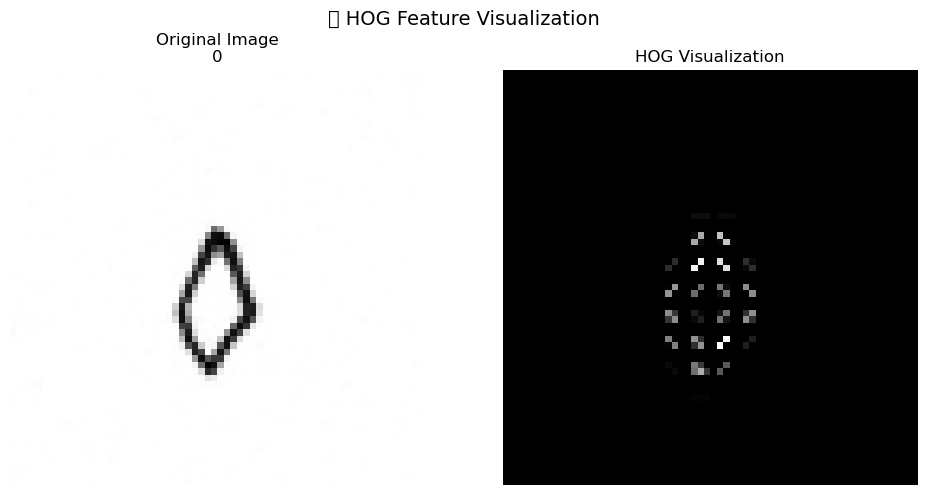

In [23]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🎨 VISUALIZE HOG FEATURES                          ║
# ╚════════════════════════════════════════════════════════════════════════════╝

if USE_HOG:
    print("\n" + "="*60)
    print("🎨 HOG Visualization")
    print("="*60)

    # Select a sample image
    sample_idx = np.random.randint(0, len(images))
    sample_img = images[sample_idx]

    # Convert to grayscale if needed
    if len(sample_img.shape) == 3:
        gray = cv2.cvtColor(sample_img, cv2.COLOR_RGB2GRAY)
    else:
        gray = sample_img

    # Get HOG with visualization
    hog_features, hog_image = hog(
        gray,
        orientations=HOG_ORIENTATIONS,
        pixels_per_cell=HOG_PIXELS_PER_CELL,
        cells_per_block=HOG_CELLS_PER_BLOCK,
        visualize=True,
        channel_axis=None
    )

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(gray, cmap='gray')
    axes[0].set_title(f'Original Image\n{CLASS_NAMES[labels[sample_idx]]}')
    axes[0].axis('off')

    axes[1].imshow(hog_image, cmap='gray')
    axes[1].set_title('HOG Visualization')
    axes[1].axis('off')

    plt.suptitle('🔬 HOG Feature Visualization', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{RESULTS_DIR}/hog_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()

---

## ✂️ Step 3: Split Dataset

### Split data into train/validation/test sets with stratification

In [24]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         ✂️ SPLIT DATASET                                   ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("✂️ Splitting Dataset")
print("="*60)

if USE_VALIDATION_SET:
    # First split: train vs (val + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        test_size=(VAL_RATIO + TEST_RATIO),
        stratify=y,
        random_state=RANDOM_SEED
    )

    # Second split: val vs test
    val_test_ratio = TEST_RATIO / (VAL_RATIO + TEST_RATIO)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=val_test_ratio,
        stratify=y_temp,
        random_state=RANDOM_SEED
    )

    print(f"\n📊 Split: Train/Validation/Test")
    print(f"   Training set: {X_train.shape[0]} samples ({TRAIN_RATIO*100:.0f}%)")
    print(f"   Validation set: {X_val.shape[0]} samples ({VAL_RATIO*100:.0f}%)")
    print(f"   Test set: {X_test.shape[0]} samples ({TEST_RATIO*100:.0f}%)")

else:
    # Simple train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1 - TRAIN_TEST_RATIO),
        stratify=y,
        random_state=RANDOM_SEED
    )
    X_val, y_val = None, None

    print(f"\n📊 Split: Train/Test only")
    print(f"   Training set: {X_train.shape[0]} samples ({TRAIN_TEST_RATIO*100:.0f}%)")
    print(f"   Test set: {X_test.shape[0]} samples ({(1-TRAIN_TEST_RATIO)*100:.0f}%)")


✂️ Splitting Dataset

📊 Split: Train/Validation/Test
   Training set: 6545 samples (70%)
   Validation set: 1402 samples (15%)
   Test set: 1403 samples (15%)


In [25]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📏 SCALE FEATURES                                  ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("📏 Scaling Features")
print("="*60)

# Create and fit scaler on training data only!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform other sets
X_test_scaled = scaler.transform(X_test)

if USE_VALIDATION_SET:
    X_val_scaled = scaler.transform(X_val)

print("\n✅ Features scaled!")
print(f"   📊 Training mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"   📊 Training std: {X_train_scaled.std():.6f} (should be ~1)")


📏 Scaling Features

✅ Features scaled!
   📊 Training mean: -0.000000 (should be ~0)
   📊 Training std: 1.000000 (should be ~1)


---

## 🤖 Step 4: Train and Compare Models

### Train multiple ML classifiers and compare their performance

In [27]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🤖 DEFINE MODELS                                   ║
# ╚════════════════════════════════════════════════════════════════════════════╝

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=RANDOM_SEED),
    #'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1),
    #'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1),
    #'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_SEED),
    #'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=RANDOM_SEED),
    #'KNN (k=5)': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    #'Naive Bayes': GaussianNB(),
    #'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED)
}

print(f"📋 Defined {len(models)} models for comparison")

📋 Defined 3 models for comparison


In [28]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🏋️ TRAIN AND COMPARE MODELS                        ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("🏋️ Training Models")
print("="*60)

results = []

# Choose evaluation set
if USE_VALIDATION_SET:
    X_eval, y_eval = X_val_scaled, y_val
    eval_name = "Validation"
else:
    X_eval, y_eval = X_test_scaled, y_test
    eval_name = "Test"

for name, model in models.items():
    print(f"\n⏳ Training: {name}...")

    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Evaluate
    y_pred = model.predict(X_eval)

    acc = accuracy_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred, average='weighted')
    prec = precision_score(y_eval, y_pred, average='weighted')
    rec = recall_score(y_eval, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Precision': prec,
        'Recall': rec,
        'Train Time (s)': train_time
    })

    print(f"   ✅ Accuracy: {acc:.4f}, F1: {f1:.4f}, Time: {train_time:.2f}s")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "="*60)
print(f"📊 Results Summary ({eval_name} Set)")
print("="*60)
print(results_df.to_string(index=False))

# Save results
results_df.to_csv(f'{RESULTS_DIR}/model_comparison.csv', index=False)

# Get best model
best_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_name} ({best_accuracy*100:.2f}%)")


🏋️ Training Models

⏳ Training: Logistic Regression...
   ✅ Accuracy: 0.8031, F1: 0.8038, Time: 20.46s

⏳ Training: SVM (Linear)...
   ✅ Accuracy: 0.8288, F1: 0.8298, Time: 442.30s

⏳ Training: Random Forest...
   ✅ Accuracy: 0.7639, F1: 0.7622, Time: 3.52s

📊 Results Summary (Validation Set)
              Model  Accuracy  F1-Score  Precision   Recall  Train Time (s)
       SVM (Linear)  0.828816  0.829807   0.832585 0.828816      442.301368
Logistic Regression  0.803138  0.803779   0.805962 0.803138       20.460676
      Random Forest  0.763909  0.762245   0.765953 0.763909        3.515781

🏆 Best Model: SVM (Linear) (82.88%)


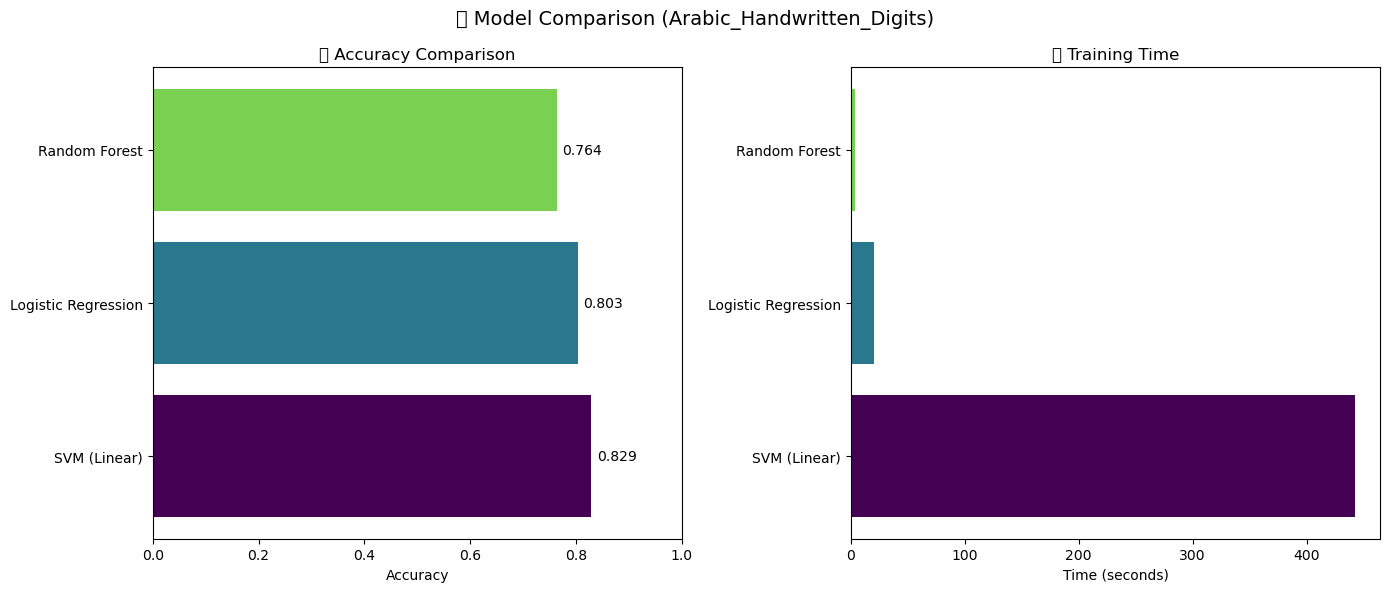

In [29]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📊 VISUALIZE MODEL COMPARISON                      ║
# ╚════════════════════════════════════════════════════════════════════════════╝

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy comparison
colors = plt.cm.viridis(np.linspace(0, 0.8, len(results_df)))
axes[0].barh(results_df['Model'], results_df['Accuracy'], color=colors)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('🎯 Accuracy Comparison')
axes[0].set_xlim([0, 1])
for i, v in enumerate(results_df['Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Training time comparison
axes[1].barh(results_df['Model'], results_df['Train Time (s)'], color=colors)
axes[1].set_xlabel('Time (seconds)')
axes[1].set_title('⏱️ Training Time')

plt.suptitle(f'📊 Model Comparison ({PROJECT_NAME})', fontsize=14)
plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 🔧 Step 5: Hyperparameter Tuning

### Fine-tune the best model using Grid Search or Random Search

In [30]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🔧 HYPERPARAMETER TUNING CONFIG                    ║
# ╚════════════════════════════════════════════════════════════════════════════╝

#TUNING_METHOD = 'grid'  # Options: 'grid' or 'random'
#CV_FOLDS = 3           # Number of cross-validation folds
MODEL_TO_TUNE = best_name  # Model to tune (from comparison results)
#C_VALUES = [0.1, 1, 10]
# Hyperparameter grids for different models
#param_grids = {
    #'SVM (RBF)': {
    #    'C': [0.1, 1, 10, 100],
    #    'gamma': ['scale', 'auto', 0.01, 0.1],
    #},
    #'SVM (Linear)': {
    #   'C': [0., 0.1, 1, 10 ]
    #}
    
#}

print(f"📋 Tuning: {MODEL_TO_TUNE}")
#print(f"   Method: {TUNING_METHOD} search")
#print(f"   CV Folds: {CV_FOLDS}")

📋 Tuning: SVM (Linear)


In [ ]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                    🔧 MANUAL HYPERPARAMETER TUNING                        ║
# ╚════════════════════════════════════════════════════════════════════════════╝

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

C_VALUES = [0.1, 1, 10]

print("\n" + "="*60)
print("🔧 Manual Hyperparameter Tuning: Linear SVM")
print("="*60)

best_acc = 0
best_C = None
best_model = None
results = []

for C in C_VALUES:
    print(f"\n⏳ Training Linear SVM (C={C})")

    model = LinearSVC(
        C=C,
        max_iter=10000,  # increase if it doesn't converge
        dual=False       # recommended if n_samples > n_features
    )

    model.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)

    results.append({'C': C, 'Accuracy': acc})

    print(f"   ✅ Validation Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_C = C
        best_model = model

print("\n🏆 Best C:", best_C)
print("🏆 Best Validation Accuracy:", best_acc)




🔧 Manual Hyperparameter Tuning: Linear SVM

⏳ Training Linear SVM (C=0.1)


In [32]:
best_model = models[best_name]


---

## 📊 Step 6: Final Evaluation on Test Set

### Evaluate the tuned model on the held-out test set

In [33]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         📊 FINAL EVALUATION                                ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("📊 Final Evaluation on Test Set")
print("="*60)

# Predict on test set
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n🏆 Test Set Results:")
print(f"   Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   F1-Score: {test_f1:.4f}")

print("\n" + "="*60)
print("📋 Classification Report")
print("="*60)
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES))


📊 Final Evaluation on Test Set

🏆 Test Set Results:
   Accuracy: 0.8232 (82.32%)
   F1-Score: 0.8243

📋 Classification Report
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       140
           1       0.79      0.79      0.79       140
           2       0.63      0.65      0.64       141
           3       0.71      0.71      0.71       140
           4       0.94      0.89      0.91       141
           5       0.86      0.79      0.82       140
           6       0.82      0.81      0.81       140
           7       0.96      0.94      0.95       140
           8       0.93      0.91      0.92       140
           9       0.89      0.88      0.89       141

    accuracy                           0.82      1403
   macro avg       0.83      0.82      0.82      1403
weighted avg       0.83      0.82      0.82      1403



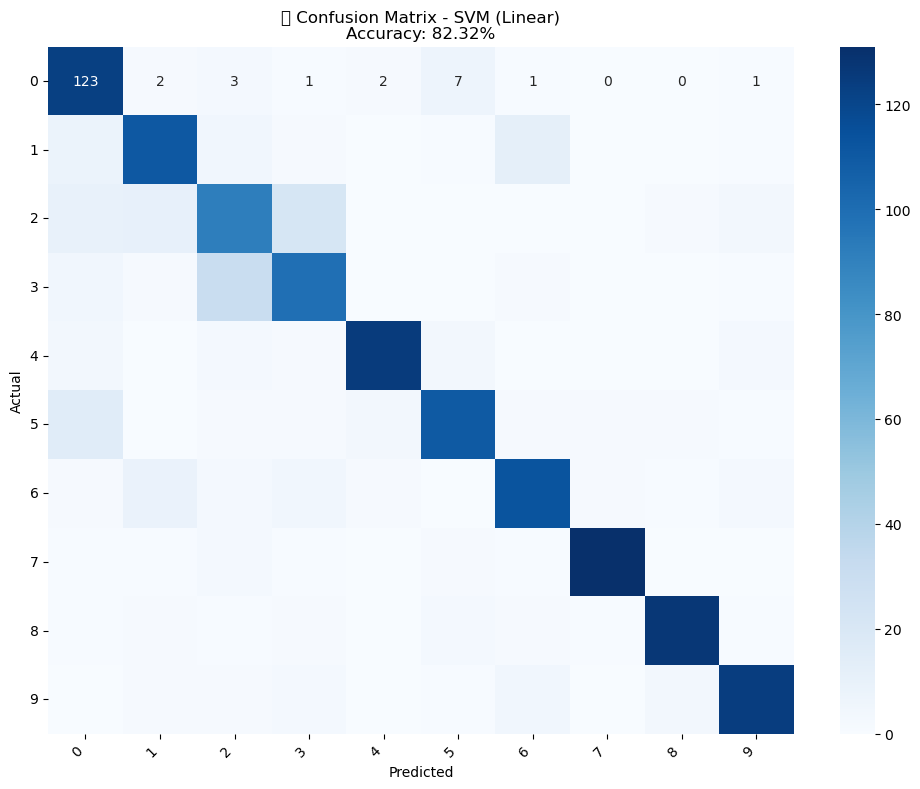

In [34]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         🔢 CONFUSION MATRIX                                ║
# ╚════════════════════════════════════════════════════════════════════════════╝

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title(f'🔢 Confusion Matrix - {MODEL_TO_TUNE}\nAccuracy: {test_accuracy:.2%}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

---

## 💾 Step 7: Save Model

### Save the trained model and preprocessing objects for deployment

In [36]:
# ╔════════════════════════════════════════════════════════════════════════════╗
# ║                         💾 SAVE MODEL AND ARTIFACTS                        ║
# ╚════════════════════════════════════════════════════════════════════════════╝

print("\n" + "="*60)
print("💾 Saving Model")
print("="*60)

models_path = Path(MODELS_DIR)

# Save the best model
joblib.dump(best_model, models_path / 'best_model.pkl')

# Save the scaler
joblib.dump(scaler, models_path / 'scaler.pkl')

# Save label encoder (class names)
le = LabelEncoder()
le.fit(CLASS_NAMES)
joblib.dump(le, models_path / 'label_encoder.pkl')

# Save model info
model_info = {
    'project_name': PROJECT_NAME,
    'model_name': MODEL_TO_TUNE,
    'test_accuracy': test_accuracy,
    'class_names': CLASS_NAMES,
    'img_size': IMG_SIZE,
    'color_mode': COLOR_MODE,
    'feature_config': {
        'use_hog': USE_HOG,
        'use_lbp': USE_LBP,
        'use_color_hist': USE_COLOR_HIST,
        'use_hsv_hist': USE_HSV_HIST,
        'use_pixel': USE_PIXEL,
        'hog_orientations': HOG_ORIENTATIONS,
        'hog_pixels_per_cell': HOG_PIXELS_PER_CELL,
        'hog_cells_per_block': HOG_CELLS_PER_BLOCK,
        'lbp_radius': LBP_RADIUS,
        'lbp_points': LBP_POINTS,
        #'color_hist_bins': COLOR_HIST_BINS,
    }
}
joblib.dump(model_info, models_path / 'model_info.pkl')

print(f"\n✅ Saved to {MODELS_DIR}/:")
print(f"   - best_model.pkl")
print(f"   - scaler.pkl")
print(f"   - label_encoder.pkl")
print(f"   - model_info.pkl")


💾 Saving Model

✅ Saved to Arabic_Handwritten_Digits_models/:
   - best_model.pkl
   - scaler.pkl
   - label_encoder.pkl
   - model_info.pkl


---

## 🌐 Step 8: Flask Web App

### Generate a Flask web application for browser-based prediction

**Features:**
- **Drag & drop** image upload
- **Real-time prediction** in browser
- **Visual probability bars**

In [37]:
"""
Digit Image Classification Web App
"""

from flask import Flask, request, jsonify, render_template_string
import numpy as np
import cv2
import joblib
import tempfile
import os

app = Flask(__name__)

# ===============================
# Load trained artifacts
# ===============================
MODEL_DIR = "Arabic_Handwritten_Digits_models"

model = joblib.load(f"{MODEL_DIR}/best_model.pkl")
scaler = joblib.load(f"{MODEL_DIR}/scaler.pkl")
label_encoder = joblib.load(f"{MODEL_DIR}/label_encoder.pkl")
info = joblib.load(f"{MODEL_DIR}/model_info.pkl")

IMG_SIZE = (64, 64)   # 🔴 MUST match training
COLOR_MODE = "grayscale"

print("✅ Model loaded")
print("Classes:", list(label_encoder.classes_))

# ===============================
# Feature extraction (MATCH TRAINING)
# ===============================
def extract_features(image):
    """
    Feature extraction MUST match training exactly:
    - HOG: orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2)
    - LBP: radius=3, points=24, uniform, 26 bins
    """
    features = []

    # Ensure grayscale (training did this)
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # -------------------
    # HOG FEATURES
    # -------------------
    hog_features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(4, 4),
        cells_per_block=(2, 2),
        channel_axis=None
    )
    features.extend(hog_features)

    # -------------------
    # LBP FEATURES
    # -------------------
    lbp = local_binary_pattern(
        gray,
        P=24,
        R=3,
        method="uniform"
    )
    hist, _ = np.histogram(
        lbp.ravel(),
        bins=26,
        range=(0, 26)
    )
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-6)
    features.extend(hist)

    return np.array(features, dtype="float32")


# ===============================
# HTML UI
# ===============================
HTML = """
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>Digit Classifier</title>
<style>
body { font-family: system-ui; background:#f4f6fb; padding:40px }
.card { max-width:500px; margin:auto; background:#fff; padding:30px;
        border-radius:15px; box-shadow:0 20px 40px rgba(0,0,0,.15) }
h1 { text-align:center }
input { margin-top:20px }
button { margin-top:20px; padding:12px 30px; font-size:16px }
.result { margin-top:20px; font-size:20px; text-align:center }
</style>
</head>
<body>
<div class="card">
<h1>🖊️ Digit Classifier</h1>
<input type="file" id="file">
<br>
<button onclick="predict()">Predict</button>
<div class="result" id="result"></div>
</div>

<script>
async function predict() {
    const f = document.getElementById("file").files[0];
    if (!f) return alert("Upload an image");

    const fd = new FormData();
    fd.append("image", f);

    const r = await fetch("/predict", { method:"POST", body:fd });
    const d = await r.json();

    if (d.error) alert(d.error);
    else document.getElementById("result").innerHTML =
        "Prediction: <b>" + d.predicted_class + "</b><br>" +
        "Confidence: " + d.confidence.toFixed(1) + "%";
}
</script>
</body>
</html>
"""

# ===============================
# Routes
# ===============================
@app.route("/")
def home():
    return render_template_string(HTML)

@app.route("/predict", methods=["POST"])
def predict():
    if "image" not in request.files:
        return jsonify({"error": "No image uploaded"}), 400

    with tempfile.NamedTemporaryFile(delete=False) as tmp:
        request.files["image"].save(tmp.name)
        path = tmp.name

    try:
        # Load image
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return jsonify({"error": "Invalid image"}), 400

        img = cv2.resize(img, IMG_SIZE)

        # Features
        features = extract_features(img)
        features_scaled = scaler.transform([features])

        # Predict
        pred = model.predict(features_scaled)[0]
        cls = label_encoder.inverse_transform([pred])[0]

        # Probabilities (if available)
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(features_scaled)[0]
            confidence = float(np.max(probs) * 100)
        else:
            confidence = 100.0

        return jsonify({
            "predicted_class": cls,
            "confidence": confidence
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 500

    finally:
        os.unlink(path)

# ===============================
# Run
# ===============================
if __name__ == "__main__":
    print("🌐 Running app at http://localhost:5000")
    app.run(debug=False, use_reloader=False, port=5000)



✅ Model loaded
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
🌐 Running app at http://localhost:5000
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Dec/2025 00:58:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 00:58:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Dec/2025 01:00:13] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 01:00:58] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 01:01:10] "POST /predict HTTP/1.1" 200 -


---

## 📋 Summary

| Step | Description |
|------|-------------|
| 0 | Configuration → Set project name, data paths, image settings |
| 1 | Image Loading → Load and preprocess images |
| 2 | Feature Extraction → Extract HOG, LBP, Color features |
| 3 | Dataset Split → Train/Validation/Test split with scaling |
| 4 | Model Training → Compare 10 ML models |
| 5 | Hyperparameter Tuning → Grid/Random Search |
| 6 | Final Evaluation → Test set metrics and confusion matrix |
| 7 | Save Model → Export for deployment |
| 8 | Web Deployment → Flask app with browser UI |

---

**Pattern Recognition Course - Faculty of Computers and Information - Mansoura University**